In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [118]:
def psycometrique(data_tuple,var2):
    result, mean_used = data_tuple
    true_array_mean_used = []
    true_array_result = []
    block_size = 1000           
    big_blocs = 11           # nb de valeurs de S2 par courbe
    size_one_block = block_size * big_blocs  

    for j in range(len(var2)):
        array_mean_result = []
        array_mean_used = []
        for i in range(0, size_one_block, block_size):
            # bloc de result
            block_r = result[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_r = sum(block_r) / len(block_r)
            array_mean_result.append(mean_r)

            # bloc de mean_used
            block_m = mean_used[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_m = sum(block_m) / len(block_m)
            array_mean_used.append(mean_m)

        true_array_result.append(array_mean_result)
        true_array_mean_used.append(array_mean_used)
    return true_array_result, true_array_mean_used


def data_var2(file_path):
    df = pd.read_csv(file_path)
    var2 = df['S2_std'].to_numpy()
    var2 = pd.unique(var2)      
    return list(var2)           


def ploter(mean_used_all, mean_res_all, var, var1=0.2):
    """
    Graphique unique : psychometric curves (x_star search)
    """

    seuil = 0.5
    x_stars = []

    fig, ax = plt.subplots(figsize=(8, 6))

    # ==========================================
    # ---------- Courbes psychométriques -------
    # ==========================================
    print("=== Points d'intersection avec P = 0.5 ===")

    for idx, (x_vals, y_vals) in enumerate(zip(mean_used_all, mean_res_all)):

        # tracer la courbe
        line, = ax.plot(x_vals, y_vals, 'o-', label=f'var = {var[idx]}')
        color = line.get_color()

        # --- recherche du passage par 0.5 ---
        x_cross = None
        for x1, y1, x2, y2 in zip(x_vals[:-1], y_vals[:-1],
                                  x_vals[1:],  y_vals[1:]):
            if (y1 - seuil) * (y2 - seuil) <= 0 and y1 != y2:
                x_cross = x1 + (seuil - y1) * (x2 - x1) / (y2 - y1)
                break

        if x_cross is not None:
            ax.scatter([x_cross], [seuil], color=color, zorder=5)
            ax.text(x_cross, seuil + 0.03, f'{x_cross:.2f}',
                     color=color, ha='center', va='bottom', fontsize=8)
            print(f'Bloc {idx+1} : x = {x_cross:.3f}')
        else:
            print(f'Bloc {idx+1} : pas de croisement avec 0.5')

        x_stars.append(x_cross)

    ax.axhline(seuil, color='red', linestyle='--', linewidth=1.5,
                label='Chance level (0.5)')

    ax.set_xlabel('Mean S2 value')
    ax.set_ylabel('Mean decision (P[1])')
    ax.set_title('Psychometric Functions')
    ax.grid(True, alpha=0.3)
    ax.legend()

    plt.tight_layout()
    plt.show()

    slopes = slope_x(x_stars, var, var1)
    return x_stars, slopes


def reading_csv(file_path, inverser = False):
    df = pd.read_csv(file_path)
    if inverser : 
        mean_used = df['S1_val'].tolist()
    else:
        mean_used = df['S2_val'].tolist()
    result = df['Decision (S1>S2)'].tolist()
    data_tuple = (result, mean_used)  
    print(len(result))
    return data_tuple


def slope_x(x_star, var2, var1=0.2):
    slopes = []
    for x, v in zip(x_star, var2):
        if x is None:
            slopes.append(np.nan)   # ou ne rien ajouter, selon ce que tu veux
            # var_valid ne prend pas ce v si tu veux vraiment ignorer ce point
        else : 
            slopes.append(x / (v**2 + var1**2))

    return slopes


def main(file_path, inverser):
    print('test')
    
    data_tuple = reading_csv(file_path, inverser=inverser)
    var2 = data_var2(file_path)
    array_mean_result, array_mean_used = psycometrique(data_tuple, var2)
    x_stars, slopes = ploter(array_mean_used, array_mean_result, var2)
    print("Slopes (≈ m0 / s0^2) :", slopes)
    print("x_stars :", x_stars)
    return slopes, x_stars

In [119]:
"""file_path = "C:\\Users\\gabri\\Desktop\\bayesian\\results-mu1_equal0.csv"
slopes, x_stars = main(file_path=file_path, inverser=False)
"""

'file_path = "C:\\Users\\gabri\\Desktop\\bayesian\\results-mu1_equal0.csv"\nslopes, x_stars = main(file_path=file_path, inverser=False)\n'


Processing file: C:\Users\gabri\Desktop\bayesian\regression\answers\experiment_results-1.csv
test
11000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 0.593


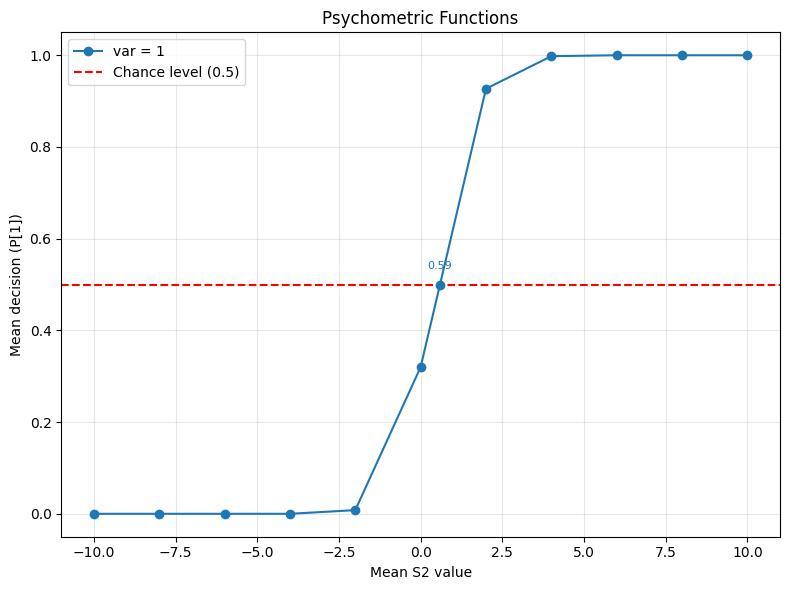

Slopes (≈ m0 / s0^2) : [np.float64(0.5702699277658091)]
x_stars : [0.5930807248764415]

Processing file: C:\Users\gabri\Desktop\bayesian\regression\answers\experiment_results-2.csv
test
11000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 1.020


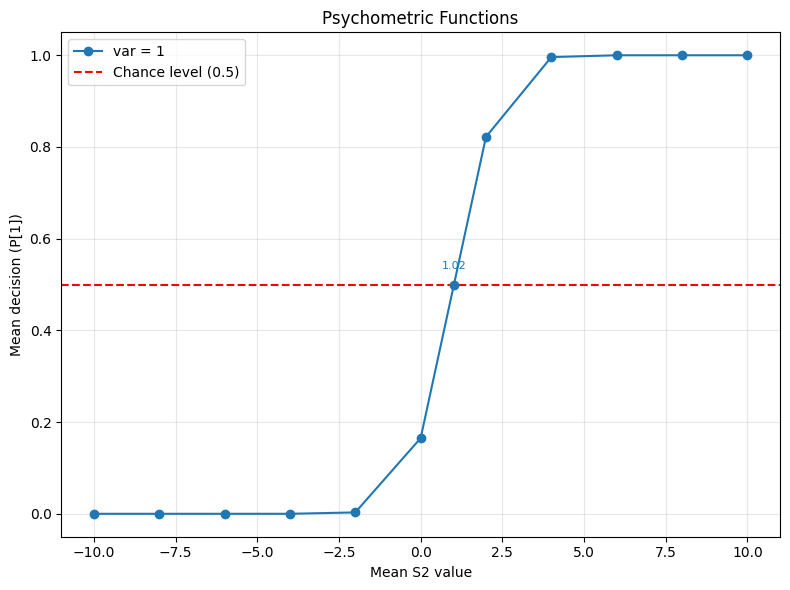

Slopes (≈ m0 / s0^2) : [np.float64(0.9805643367287203)]
x_stars : [1.0197869101978692]

Processing file: C:\Users\gabri\Desktop\bayesian\regression\answers\experiment_results-3.csv
test
11000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 1.599


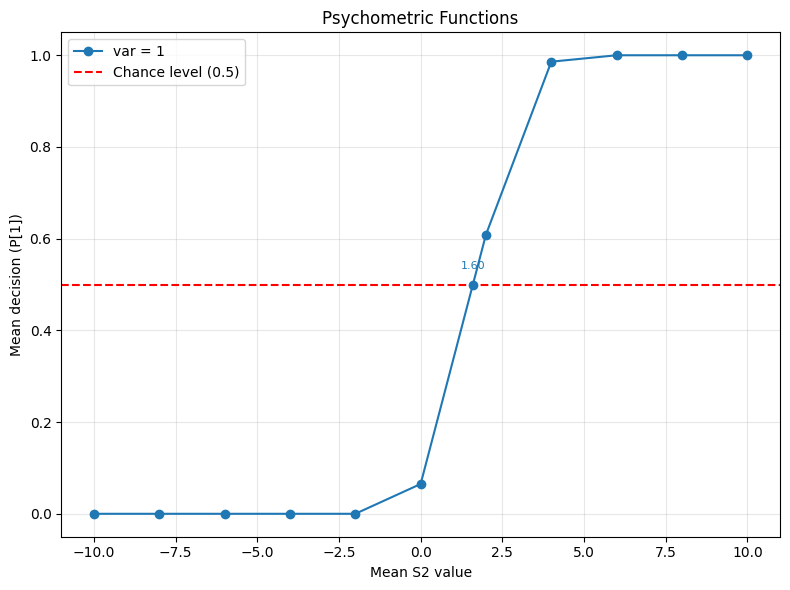

Slopes (≈ m0 / s0^2) : [np.float64(1.5377545248868776)]
x_stars : [1.5992647058823528]

Processing file: C:\Users\gabri\Desktop\bayesian\regression\answers\experiment_results-4.csv
test
11000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 2.336


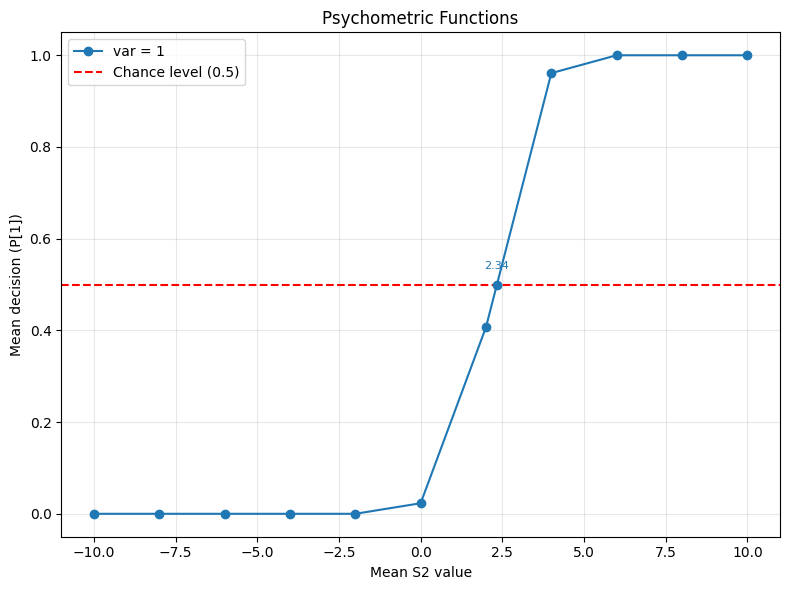

Slopes (≈ m0 / s0^2) : [np.float64(2.2459039155790057)]
x_stars : [2.335740072202166]

Processing file: C:\Users\gabri\Desktop\bayesian\regression\answers\experiment_results-5.csv
test
11000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 2.867


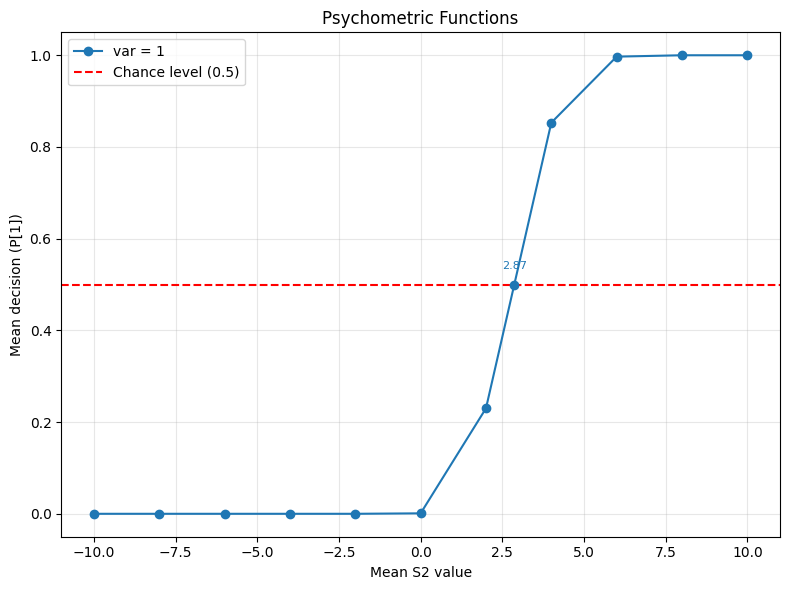

Slopes (≈ m0 / s0^2) : [np.float64(2.756513149771577)]
x_stars : [2.86677367576244]

Processing file: C:\Users\gabri\Desktop\bayesian\regression\answers\experiment_results-6.csv
test
11000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 3.322


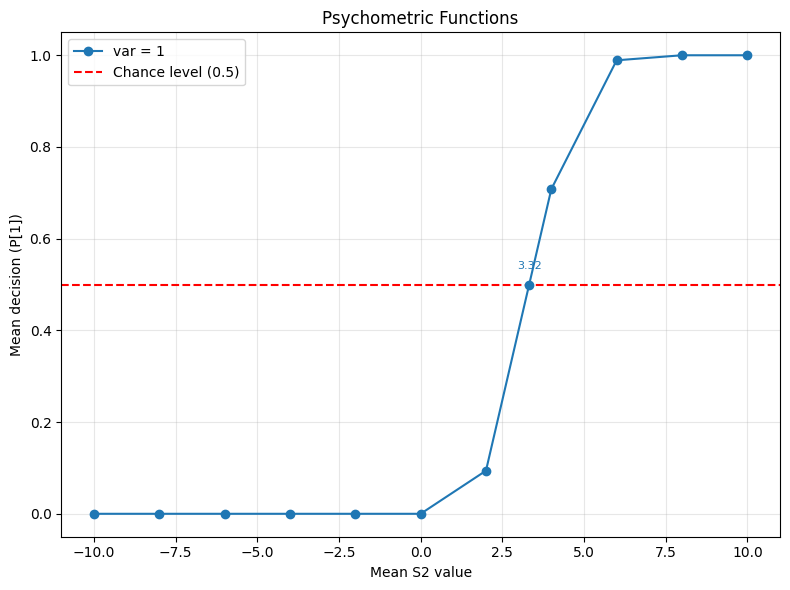

Slopes (≈ m0 / s0^2) : [np.float64(3.1946880481082434)]
x_stars : [3.3224755700325734]

Processing file: C:\Users\gabri\Desktop\bayesian\regression\answers\experiment_results-7.csv
test
11000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 3.896


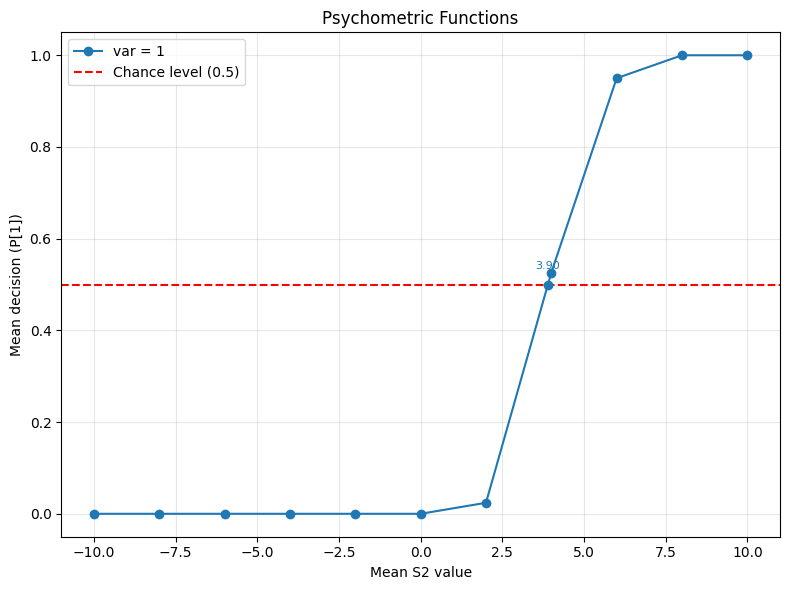

Slopes (≈ m0 / s0^2) : [np.float64(3.746552252528348)]
x_stars : [3.896414342629482]

Processing file: C:\Users\gabri\Desktop\bayesian\regression\answers\experiment_results-8.csv
test
11000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 4.702


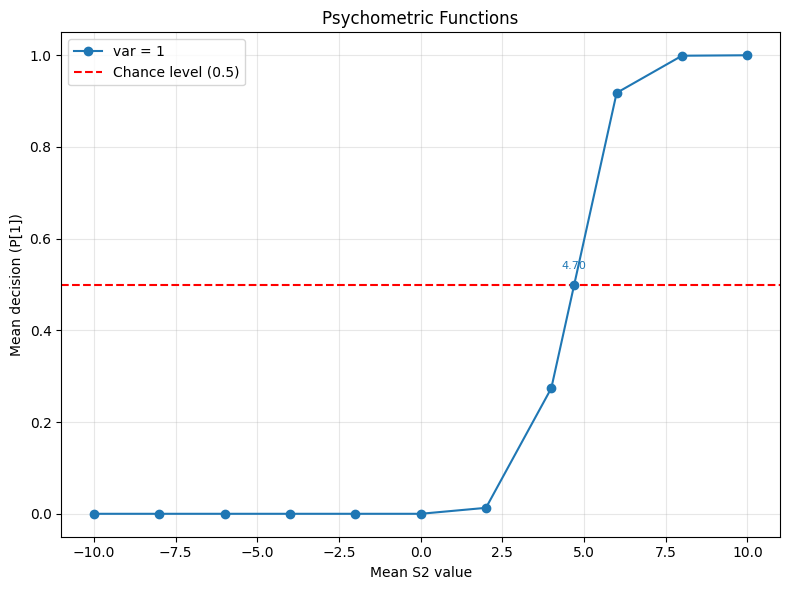

Slopes (≈ m0 / s0^2) : [np.float64(4.521022455805064)]
x_stars : [4.7018633540372665]

Processing file: C:\Users\gabri\Desktop\bayesian\regression\answers\experiment_results-9.csv
test
11000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 5.132


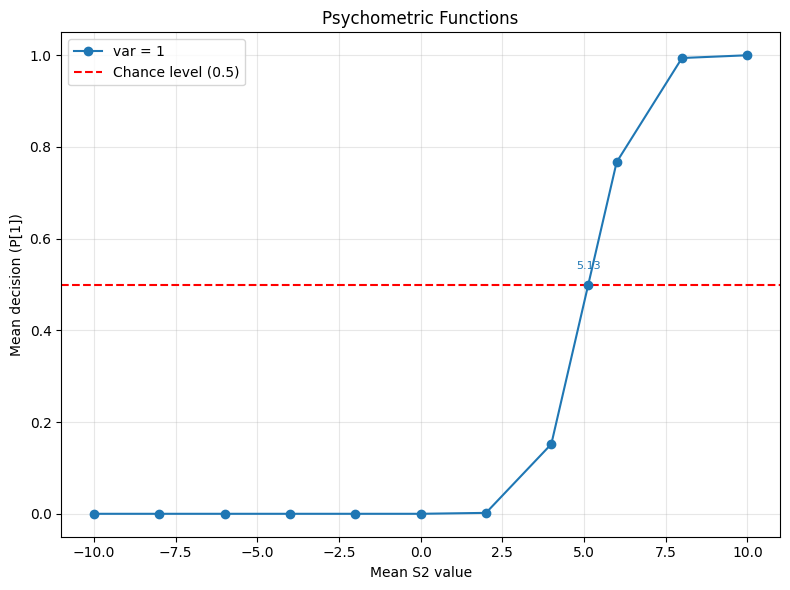

Slopes (≈ m0 / s0^2) : [np.float64(4.934333958724203)]
x_stars : [5.131707317073171]

Processing file: C:\Users\gabri\Desktop\bayesian\regression\answers\experiment_results-10.csv
test
11000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 5.648


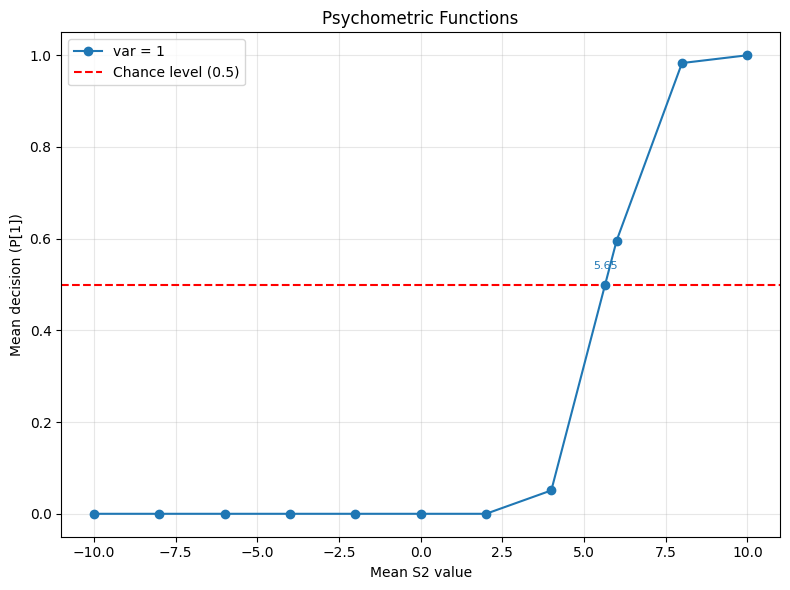

Slopes (≈ m0 / s0^2) : [np.float64(5.430486944248412)]
x_stars : [5.647706422018349]
Values : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[[0.5930807248764415], [1.0197869101978692], [1.5992647058823528], [2.335740072202166], [2.86677367576244], [3.3224755700325734], [3.896414342629482], [4.7018633540372665], [5.131707317073171], [5.647706422018349]]


In [120]:
files = [f"C:\\Users\\gabri\\Desktop\\bayesian\\regression\\answers\\experiment_results-{i}.csv" for i in range(1, 11)]
x_stars = []
vals = []
inverser = True
for i, file_path in enumerate(files):
    print("\nProcessing file:", file_path)
    slope, x_star = main(file_path=file_path , inverser=inverser)
    x_stars.append(x_star)
    val = file_path.split("equal")[-1].split(".csv")[0]
    vals.append(i)
print("Values :", vals)
print(x_stars)
    
    


===== RESULTS =====
Slope a = [0.57530783]
Offset b = [0.52259607]


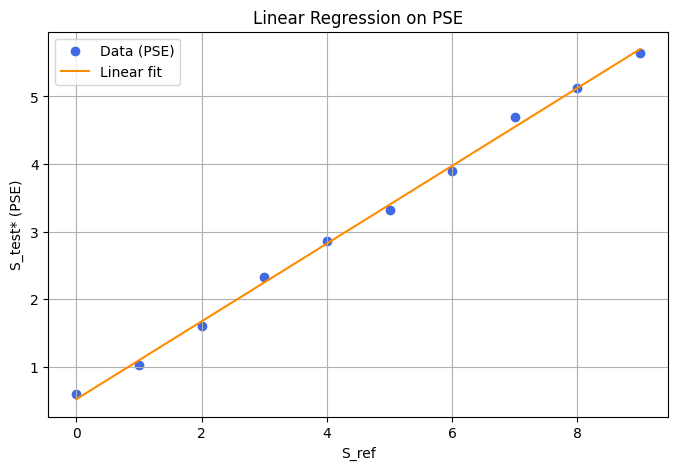

In [121]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# --- Tes données doivent déjà exister ---
# vals  : les valeurs de S_ref
# x_stars : les PSE trouvées pour chaque S_ref

X = np.array(vals).reshape(-1, 1)
y = np.array(x_stars)

# Régression linéaire
reg = LinearRegression().fit(X, y)

a = reg.coef_[0]       # pente
b = reg.intercept_     # offset

print("\n===== RESULTS =====")
print("Slope a =", a)
print("Offset b =", b)

# --- PLOT ---
plt.figure(figsize=(8,5))
plt.scatter(vals, x_stars, color="royalblue", label="Data (PSE)")
plt.plot(vals, reg.predict(X), color="darkorange", label="Linear fit")

plt.xlabel("S_ref")
plt.ylabel("S_test* (PSE)")
plt.title("Linear Regression on PSE")
plt.legend()
plt.grid(True)
plt.show()


In [122]:
def compute_tau_p(alpha, tau_test, tau_ref):
    numerator = tau_test * tau_ref * (1 - alpha)
    denominator = alpha * tau_ref - tau_test
    return numerator / denominator

def compute_mu_p(tp, tref, ttest, beta):
    val = (tp * (ttest - tref)) / (ttest*(tref + tp))
    return beta / val
    

In [123]:
a = reg.coef_[0]       # pente
b = reg.intercept_  
ttest = 0.2
tref = 1
alpha = a[0]
beta = b[0]
tp = compute_tau_p(alpha, ttest, tref)
mean = compute_mu_p(tp, tref, ttest, beta)

In [124]:
print("tp =", tp)
print("var= " , 1/tp)

tp = 0.22631671098689962
var=  4.418586659550232


In [125]:
print("mean =", mean)

mean = -0.7079330249792527
